In [1]:
#!/usr/bin/env python3
from rosbags.rosbag1 import Reader
from rosbags.serde import deserialize_cdr, ros1_to_cdr
from rosbags.typesys import get_types_from_msg, register_types
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Unpack ROSBag

In [2]:
add_types = {}
msg_text = Path('/home/eurus/Documents/College/Sem_4/ENAE788M/proj/ws/src/Project_Catch/vicon_bridge/msg/Marker.msg').read_text()
add_types.update(get_types_from_msg(msg_text, 'vicon_bridge/Marker'))
register_types(add_types)
msg_text = Path('/home/eurus/Documents/College/Sem_4/ENAE788M/proj/ws/src/Project_Catch/vicon_bridge/msg/Markers.msg').read_text()
add_types.update(get_types_from_msg(msg_text, 'vicon_bridge/Markers'))
register_types(add_types)
msg_text = Path('/home/eurus/Documents/College/Sem_4/ENAE788M/proj/ws/devel/share/estimator/msg/ParabolicTrackerActionFeedback.msg').read_text()
add_types.update(get_types_from_msg(msg_text, 'estimator/ParabolicTrackerActionFeedback'))
register_types(add_types)

msg_text = Path('/home/eurus/Documents/College/Sem_4/ENAE788M/proj/ws/devel/share/estimator/msg/ParabolicTrackerFeedback.msg').read_text()
add_types.update(get_types_from_msg(msg_text, 'estimator/ParabolicTrackerFeedback'))
register_types(add_types)

msg_text = Path('/opt/ros/noetic/share/actionlib_msgs/msg/GoalStatus.msg').read_text()
add_types.update(get_types_from_msg(msg_text, 'actionlib_msgs/GoalStatus'))
register_types(add_types)
msg_text = Path('/opt/ros/noetic/share/actionlib_msgs/msg/GoalID.msg').read_text()
add_types.update(get_types_from_msg(msg_text, 'actionlib_msgs/GoalID'))
register_types(add_types)
msg_text = Path('/opt/ros/noetic/share/actionlib_msgs/msg/GoalStatusArray.msg').read_text()
add_types.update(get_types_from_msg(msg_text, 'actionlib_msgs/GoalStatusArray'))
register_types(add_types)


In [3]:
t_count = 0
marker_pos = {t_count: []}
deltaAltitude = []
prev_t = False
# with Reader('/home/eurus/Documents/College/Sem_4/ENAE788M/proj/ws/src/Project_Catch/misc/marker_throw/throw_1.bag') as reader:
with Reader('/home/eurus/Documents/College/Sem_4/ENAE788M/proj/ws/2023-05-14-21-46-36.bag') as reader:
    for connection, timestamp, rawdata in reader.messages():
        if connection.topic == '/estimator_node/feedback':
            msg = deserialize_cdr(ros1_to_cdr(rawdata, connection.msgtype), connection.msgtype)
            marker_pos[t_count] = []
            if(len(msg.feedback.predictedTrajectory)):
                currTraj = []
                for i in range(len(msg.feedback.predictedTrajectory)):
                    currTraj.append([msg.feedback.predictedTrajectory[i].x, msg.feedback.predictedTrajectory[i].y, msg.feedback.predictedTrajectory[i].z])
                marker_pos[t_count].append(np.array(currTraj))        
            t_count+=1
            deltaAltitude.append(msg.feedback.deltaAltitude)

In [13]:
marker_pos[i][0][np.where(marker_pos[i][0][:,2]<0.7)[0][0],1]

-0.7226648087035934

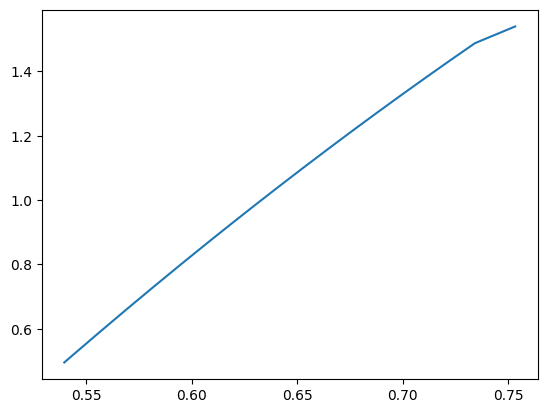

In [4]:
# ax = plt.axes()
# first = False
# for marker in marker_pos:
#     if(len(marker_pos[marker])):
#         first = True
#         ax.plot( marker_pos[marker][0][:,2])
#     else:
#         if(first):
#             plt.show()
#         first = False
#         ax = plt.axes()
i = 70
plt.plot(marker_pos[i][0][:,],marker_pos[i][0][:,2])

In [5]:
marker_pos[5]

[]

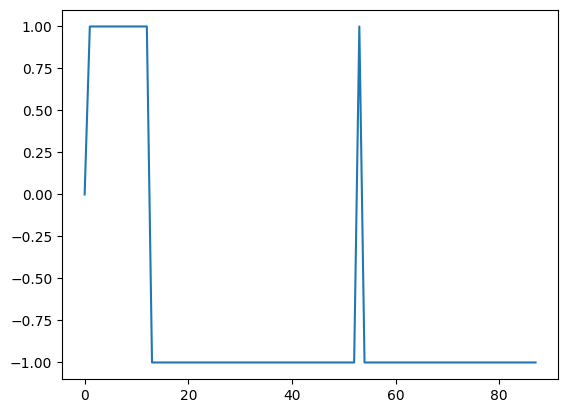

In [6]:
plt.plot(deltaAltitude)